# Example of Resonance Filtering and Modified H-K Stacking of Receiver Functions

This notebook demonstrates the resonance filtering of receiver functions to remove sediment signals before modified H-K Stacking analysis based on ReverbFilter module of [rfsed](https://github.com/akinremisa/rfsed) package
In the first step, the receiver function data is stacked over the different ray parameters and the sediment signal is filtered out using ResonanceFilt function

In this example, the data used is from Station OPLO (Network: NL) in the Netherlands. It is located on thick sedimentary layers. The sediment effects observed include an apparent shift in the first peak due to arrivals from the sediment-basement interface. Also, some amplitude interference is observed in the Moho conversion signal due to the arrivals of the sediment reverberation phases. Hence, the effects of the sediment on the receiver function leads to poorly defined resonance filter (due to thick sediment, weak sediment reverberation or non-monotonic reverberation) and leads to inaccurate estimate of the Moho depth and Vp/Vs using the modified H-K Stacking after reonance filtering.  


The required functions are first imported 

In [1]:
#%% Example of Resonance filtering and Modified HK Stacking of Yu et al 2015
import os 
import numpy as np
from rfsed.ReverbFilter import ResonanceFilt, plotfiltrf
from rfsed.hkYu import hkYu, plothkYu
from rfsed.util import rfMoho_example, save_plot

The station and the directory to save the output are defined. 

In [2]:
savedir=save_plot()
savepath = savedir + '/Resonance_Filtering/'
if not os.path.exists(savepath):  # create data folder if necessary
    os.mkdir(savepath)

The data and the preonset time in the data are defined

In [3]:
rfstream= rfMoho_example()
preonset=10

The resonance filtering is done, visualised and saved to a file

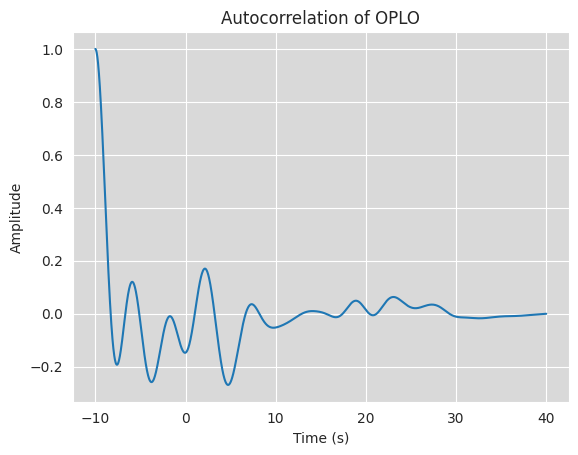

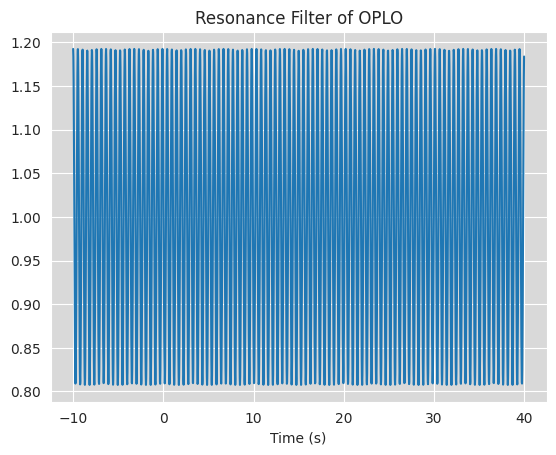

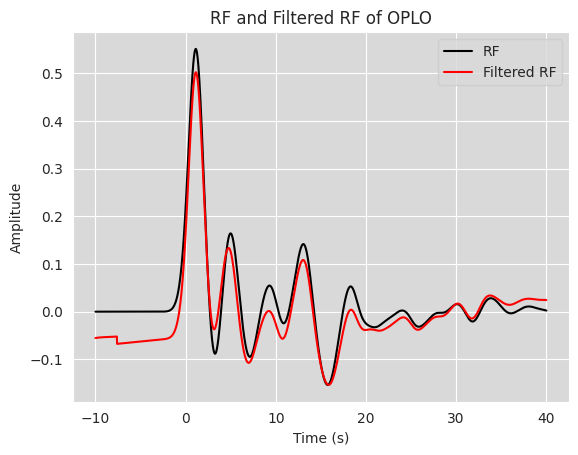

In [4]:
FilteredRF= ResonanceFilt(rfstream, preonset)
plotfiltrf(FilteredRF, savepath, format = 'jpg')

After the resonance filtering, a modified H-K Stacking is done to account for the time delay in the Moho phases

The save path for the modified H-K Stacking is defined

In [5]:
savedir=save_plot()
savepath = savedir + '/HK_Yu_Method/'
if not os.path.exists(savepath):  # create data folder if necessary
    os.mkdir(savepath)

The Moho and Sediment phase stacking weights are defined
The data parameters are set

In [6]:
rfstream= rfMoho_example()
preonset=10
VpSed=2.1
VpMoho=6.9
SedH= 0.6
VsSed= 0.7858 - 1.2344*VpSed + 0.7949*VpSed**2 - 0.1238*VpSed**3 + 0.0064*VpSed**4
gaussalp=1.25
rayp = 0.04
w1Sed, w2Sed, w3Sed = [0.6, 0.3, 0.1]
w1SubSed, w2SubSed, w3SubSed = [0.6, 0.3, 0.1]

Modified HK Stacking of Yu et al 2015 is done. This requires result from Resonance filter as input

Sediment thickness based on the layer 2-way travel time is 0.8124300480000007 km


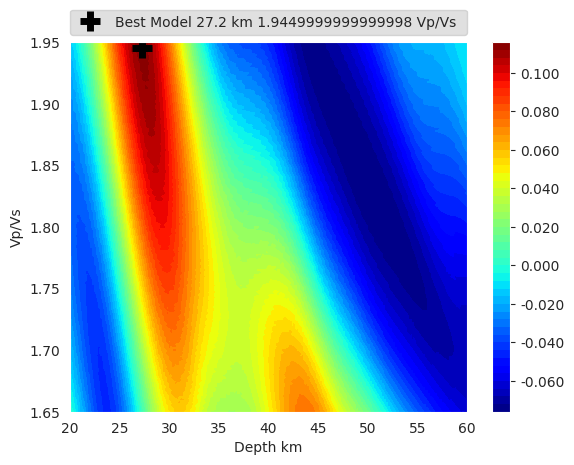

Best Subsediment thickness:  27.2 Best Subsediment Vp/Vs: 1.9449999999999998 Max stack:  0.11408399015435769


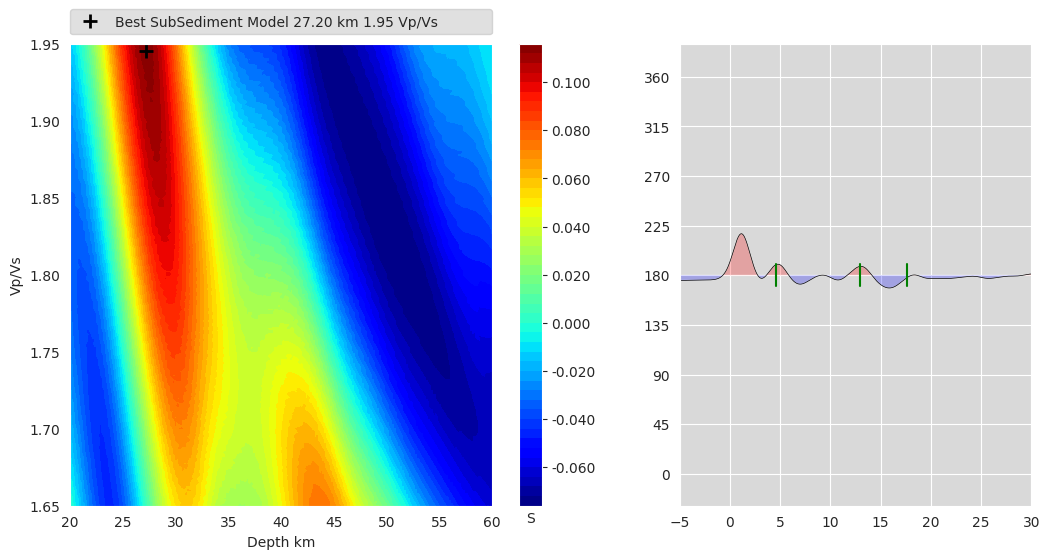

In [7]:
#----------------------------------------------------------
FilteredRF= ResonanceFilt(rfstream, preonset)
# plotfiltrf(FilteredRF, savepath, format = 'jpg')
HKResults=hkYu(FltResult=FilteredRF, rayp=rayp, HSubSed=np.linspace(20,60,201), KSubSed=np.linspace(1.65,1.95,121), 
             VpMoho=VpMoho, VpSed= VpSed, VsSed=VsSed, w1SubSed=w1SubSed, w2SubSed=w2SubSed, w3SubSed=w3SubSed)

plothkYu(hkYuResult=HKResults, savepath=savepath, g = [75.,10., 15., 2.5], rmneg = None, format = 'jpg')